In [2]:
import sys
import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../src')
from fit_distributions import DistributionFitter

In [5]:
df = pd.read_csv("../leheron_trialbytrial/leheron_trialbytrial.csv")

In [6]:
df.head()

,sub,patch,env,leaveT,meanLT,dmLeave
0,1,3,1,45.034784,40.532927,4.501856
1,1,2,1,44.403900,40.532927,3.870973
2,1,3,1,61.168672,40.532927,20.635745
3,1,1,1,26.803514,40.532927,-13.729413
4,1,3,1,56.992002,40.532927,16.459075


In [52]:
subject = 11
patch = 3
env = 1

patch_names = {1: 'Low', 2: 'Medium', 3: 'High'}
env_names = {1: 'Rich', 2: 'Poor'}

all_results = []

In [53]:
leave_times = df[
                (df['sub'] == subject) & 
                (df['patch'] == patch) & 
                (df['env'] == env)
            ]['leaveT'].values

In [54]:
leave_times

array([ 3.75152048,  6.070562  ,  8.83412504, 11.71207455, 10.95427589,
       10.93767518, 11.55684637, 11.70379087, 11.03768419,  9.59213987,
        9.18558862, 12.18253244,  8.86875786,  8.66871257, 13.2231705 ,
       18.68723121, 17.17369519, 14.30631933, 16.39261961, 17.3016669 ,
       13.22290494])

In [58]:
# Fit distributions
fitter = DistributionFitter(leave_times)
fit_results = fitter.fit_all()

# Store results for each distribution
for dist_name, results in fit_results.items():
    all_results.append({
        'subject': subject,
        'patch_type': patch_names[patch],
        'environment': env_names[env],
        'distribution': dist_name,
        'aic': results['aic'],
        'bic': results['bic'],
        'logL': results['logL'],
        'params': str(results['params'])
    })
results_df = pd.DataFrame(all_results)

In [48]:
def plot_distribution_fits(data, fit_results, name):
    """Plot histogram of data with fitted distributions"""
    plt.figure(figsize=(10, 6))
    
    # Plot histogram of actual data
    plt.hist(data, density=True, alpha=0.5, label='Data')
    
    # Plot fitted distributions
    x = np.linspace(min(data), max(data), 100)
    for dist_name, results in fit_results.items():
        try:
            if dist_name == 'normal' and name == 'normal':
                plt.plot(x, stats.norm.pdf(x, *results['params']), 
                        label=f'{dist_name}')
            # elif dist_name == 'gamma':
            #     plt.plot(x, stats.gamma.pdf(x, *results['params']),
            #             label=f'{dist_name}')
            elif dist_name == 'lognormal' and name == 'lognormal':
                plt.plot(x, stats.lognorm.pdf(x, *results['params']),
                        label=f'{dist_name}')
                plt.xscale('log')
            # Add other distributions...
        except:
            continue
            
    plt.xlabel('Leaving Time')
    plt.ylabel('Density')
    plt.legend()
    plt.title('Distribution Fits')

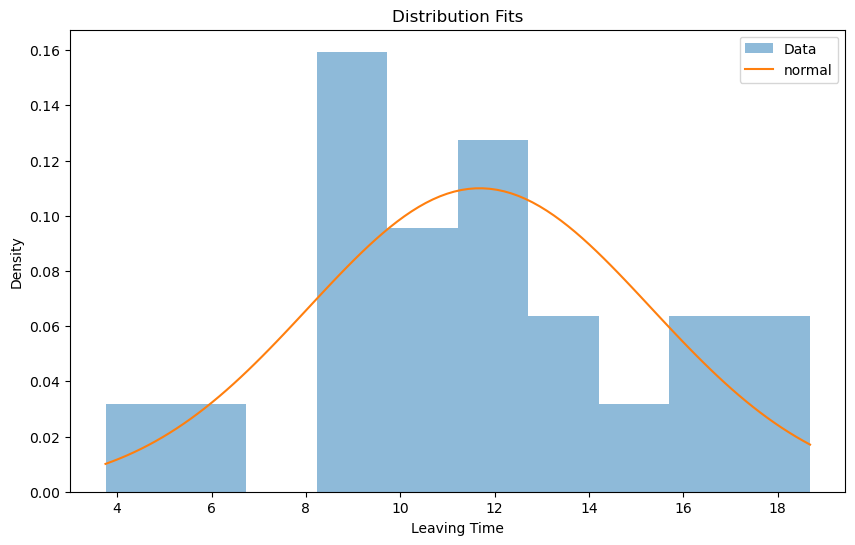

In [56]:
plot_distribution_fits(leave_times, fit_results, "normal")

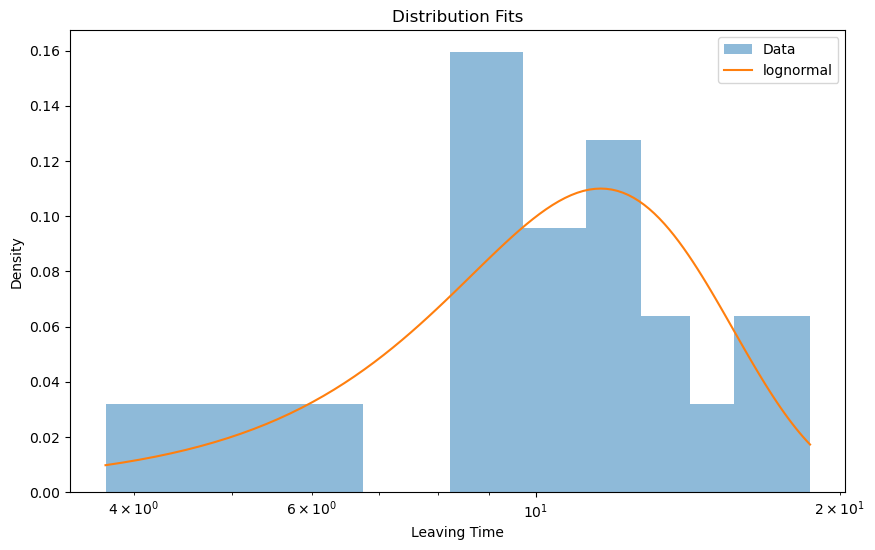

In [57]:
plot_distribution_fits(leave_times, fit_results, "lognormal")


In [59]:
results_df

,subject,patch_type,environment,distribution,aic,bic,logL,params
0,11,High,Rich,normal,117.726146,119.815191,-56.863073,"(np.float64(11.68399493342857), np.float64(3.6..."
1,11,High,Rich,lognormal,117.719289,119.808334,-56.859644,"(np.float64(0.015787272369799873), -218.145890..."
2,11,High,Rich,gamma,117.719154,119.808199,-56.859577,"(np.float64(2126.0197052549374), np.float64(-1..."
3,11,High,Rich,exponential,130.980531,132.025053,-64.490266,"(3.751520476, 7.932474457428571)"
4,11,High,Rich,weibull,117.687805,119.776850,-56.843903,"(np.float64(3.4716733106867115), np.float64(0...."
5,11,High,Rich,uniform,117.557712,119.646757,-56.778856,"(3.751520476, 14.935710734)"
6,11,High,Rich,bimodal_normal,106.622006,111.844618,-48.311003,[1.13338322e+01 3.35417021e+00 1.86872312e+01 ...
7,11,High,Rich,normal,117.726146,119.815191,-56.863073,"(np.float64(11.68399493342857), np.float64(3.6..."
8,11,High,Rich,lognormal,117.719289,119.808334,-56.859644,"(np.float64(0.015787272369799873), -218.145890..."
9,11,High,Rich,gamma,117.719154,119.808199,-56.859577,"(np.float64(2126.0197052549374), np.float64(-1..."
